In [1]:
# Actually you didn't remove bambi and arviz and formulae because you installed them from
# jupyter directly with magic % => solve this problem (if they get imported they are still installed)
# import arviz as az
# import bambi as bmb
# import formulae
# from formulaic import formula

In [2]:
# A script to automate models generation, models performances
# and graphical representations for psychological research. It
# generates a JSON report and takes data from it for an
# intelligent categorization of the database variablels.

In [3]:
# You must have R installed sistem-wide at '/usr/lib/R', the default
# installation folder in Linux operating systems. Otherwise modify
# the path of the R_HOME environment variable.
# It is recommended to install R from terminal because doing it from jupyter
# may cause problems for password typing and admin permissions when
# installation commands are run.
# It is recommended to install all python packages in a virtual environment.
# If you're using a python venv to install packages, install them with
# pip with the -m option. This with install the packages in the
# virtual environment.
# To install them from Jupyter Notebook run "!python3 -m pip install rpy2"
# in a cell.

# Install pillow from Jupyter cell with "%pip install pillow"
# Install ipympl from Jupyter cell with "%pip install ipympl"

# Install LMER packages (THIS TAKES ABOUT 3~5 minutes)

# # Enable the rpy2 interface, which allows for the seamless integration
# # of R within a Python environment.

# %load_ext rpy2.ipython
# import rpy2
# packnames = ('lme4', 'lmerTest', 'emmeans', 'geepack', 'performance', 'graphics', 'ggplot2', 'gglm')
# utils = rpy2.robjects.packages.importr("utils")
# utils.chooseCRANmirror(ind=1)
# utils.install_packages(rpy2.robjects.vectors.StrVector(packnames))

In [4]:
# Importing Python packages
import os
import rpy2
import pandas as pd
from IPython.display import display, Image

# Set env variable R_HOME through python. Change the path according to your platform/OS
# and your filesystem.
os.environ['R_HOME'] = '/usr/lib/R'

# Enable cell magic for rpy2 interface.
# %R and %%R are the line and cell magics, respectively.
%load_ext rpy2.ipython

# Loading R packages
graphics = rpy2.robjects.packages.importr('graphics') # Equivalent to "library(graphics)"
lme4 = rpy2.robjects.packages.importr('lme4')
lmerTest = rpy2.robjects.packages.importr('lmerTest')
performance = rpy2.robjects.packages.importr('performance')
graphics = rpy2.robjects.packages.importr('graphics')
ggplot2 = rpy2.robjects.packages.importr('ggplot2')
gglm = rpy2.robjects.packages.importr('gglm')
gridExtra = rpy2.robjects.packages.importr('gridExtra')

# Importing my modules
from data_cleaner import clean_dataframe
import ydata_profiling_generator
from vars_conversion import load_yprofiling_report, build_dtypes_dict, convert_datatypes, represent_dtype_changelog
from print_models_amount import models_amount_msg
import models_generator
import models_features
import models_comparison
import r_warnings
import r_graphics

In [5]:
# Load database and build pandas DataFrame
df = pd.read_csv("../../../../data/data_gov_USA/adult-depression-lghc-indicator-24.csv")

In [6]:
df

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,NaN,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664.0,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108.0,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371.0,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022.0,13.54,10.44,16.65
...,...,...,...,...,...,...,...,...
156,2018,Age,18 to 34,496,1623933.0,17.69,13.72,21.66
157,2018,Age,35 to 44,285,749615.0,14.56,10.91,18.21
158,2018,Age,45 to 54,301,1052945.0,20.06,15.60,24.52
159,2018,Age,55 to 64,432,854201.0,21.44,17.65,25.23


In [7]:
# Variable dtypes before pre-processing or reporting
df.dtypes

Year                    int64
Strata                 object
Strata Name            object
Frequency               int64
Weighted Frequency    float64
Percent               float64
Lower 95% CL          float64
Upper 95% CL          float64
dtype: object

In [8]:
# Generate ydata-profiling report and store it in same
# folder where this script is stored.
ydata_profiling_generator.generate_profiling_report(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/franaz/coding/python/.venv/lib/python3.10/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Total'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Clean the dataframe and print shape difference
df = clean_dataframe(df)

# Please note:
# For semplicity and function reuse I've decided to keep
# df and not cleaned_df. After this point we will then keep
# df, but it is actually the cleaned df instead of the original one.


-----------------------
Original df shape: (161, 8)
Cleaned df shape: (161, 8)
-----------------------



In [10]:
# Generates the ydata-profiling report in the same
# folder of this script and loads it in this
# environment, allowing ops with the JSON reported data.
# It intelligrently gives his data types to
# the variables in the dataframe, which will
# be useful for vars conversion later.
data_profile = load_yprofiling_report()

In [11]:
# n.b.! Theese dtypes are not the same used by pandas, so we must match
# them before converting the vars of a pandas dataframe.
report_dtypes = build_dtypes_dict(data_profile)

In [12]:
# Create an object that contains the original dtypes
original_dtypes = df.dtypes

In [13]:
# Variable dtypes according to ydata-profiling inferences
report_dtypes

{'Year': 'Numeric',
 'Strata': 'Categorical',
 'Strata Name': 'Categorical',
 'Frequency': 'Numeric',
 'Weighted Frequency': 'Numeric',
 'Percent': 'Numeric',
 'Lower 95% CL': 'Numeric',
 'Upper 95% CL': 'Numeric'}

In [14]:
# Convert the DataFrame dtypes
# "Not found" columns should be the ones that have been deleted
# after cleaning
df = convert_datatypes(df, report_dtypes)

In [15]:
represent_dtype_changelog(df, original_dtypes)

-----------------------
Variable conversion log
-----------------------

year: int64 --> float64
strata: object --> category
strata_name: object --> category
frequency: int64 --> float64


In [16]:
df

,year,strata,strata_name,frequency,weighted_frequency,percent,lower_95%_cl,upper_95%_cl
0,2012.0,Total,Total,1920.0,2015.0,11.74,11.11,12.37
1,2012.0,Sex,Male,561.0,1116664.0,8.12,7.32,8.92
2,2012.0,Sex,Female,1359.0,2163108.0,15.25,14.30,16.20
3,2012.0,Race-Ethnicity,White,1314.0,1806371.0,14.57,13.67,15.46
4,2012.0,Race-Ethnicity,Black,97.0,222022.0,13.54,10.44,16.65
...,...,...,...,...,...,...,...,...
156,2018.0,Age,18 to 34,496.0,1623933.0,17.69,13.72,21.66
157,2018.0,Age,35 to 44,285.0,749615.0,14.56,10.91,18.21
158,2018.0,Age,45 to 54,301.0,1052945.0,20.06,15.60,24.52
159,2018.0,Age,55 to 64,432.0,854201.0,21.44,17.65,25.23


In [17]:
# 2nd conversion attempt through infer_objects()
df.dtypes

year                   float64
strata                category
strata_name           category
frequency              float64
weighted_frequency     float64
percent                float64
lower_95%_cl           float64
upper_95%_cl           float64
dtype: object

In [18]:
# Create Python df copy dataframe to be converted to R's dataframe
df_r = df

In [19]:
# Converting df from pandas dataframe to R database (but it is not yet in
# the global envirmonment of R).

# Converting data frames back and forth between rpy2 and pandas should
# be largely automated (no need to convert explicitly, it will be done
# on the fly in most rpy2 functions). To convert explicitly, the functions
# are pandas2ri.py2ri() and pandas2ri.ri2py().
rpy2.robjects.pandas2ri.activate()

# Transfer the DataFrame to R, making it accessible as a
# global envirmonment variable from R and callable usable
# from python. This also converts Pandas categorical vars
# to R's factor vars
rpy2.robjects.globalenv['df_r'] = rpy2.robjects.pandas2ri.py2rpy(df_r)

In [20]:
%%R

# R dataframe
str(df_r)

'data.frame':	161 obs. of  8 variables:
 $ year              : num  2012 2012 2012 2012 2012 ...
 $ strata            : Factor w/ 6 levels "Age","Education",..: 6 5 5 4 4 4 4 4 2 2 ...
 $ strata_name       : Factor w/ 23 levels "$100,000+","$20,000 - $34,999",..: 22 18 15 23 13 17 12 20 19 16 ...
 $ frequency         : num  1920 561 1359 1314 97 ...
 $ weighted_frequency: num  2015 1116664 2163108 1806371 222022 ...
 $ percent           : num  11.74 8.12 15.25 14.57 13.54 ...
 $ lower_95%_cl      : num  11.11 7.32 14.3 13.67 10.44 ...
 $ upper_95%_cl      : num  12.37 8.92 16.2 15.46 16.65 ...


In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
4: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
5: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
6: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
7: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ con

In [21]:
# Setting the desired variables for the models.
response_var="percent"
predictor_vars=["strata"]

In [22]:
model_formulas = models_generator.generate_all_models(df, response_var, predictor_vars)

In [23]:
models_amount_msg(model_formulas)



------------------------------------------------------------------------
Generating and comparing 8 models...
------------------------------------------------------------------------



In [24]:
model_formulas

['percent ~ 1',
 'percent ~ strata',
 'percent ~ strata + (strata | strata)',
 'percent ~ 1 + (1 | strata)',
 'percent ~ 1 + (0 + strata | strata)',
 'percent ~ strata + (1 | strata)',
 'percent ~ 1 + (strata | strata)',
 'percent ~ strata + (0 + strata | strata)']

In [25]:
# but probably it generated that warning because your random effects are very small.
# It is likely that one of your variables is not being evaluated as contributing to the
# variance. Most likely, the "culprit" is the random variable (subj in your case). If you look
# at the output of your model (just print ce_model and hit enter, or summary(ce_model)), there
# should be a variable that has zero or very nearly zero variance and standard deviation.
# In lmer, a singular fit could be caused by collinearity in fixed effects, as in any other linear model.
# That would need you to revise your model by removing terms. But in lmer, that (or a "boundary (singular)
# fit" warning) can also be also triggered in quite simple models when a random effect variance 
# is estimated very near zero and (very loosely) the data is not sufficiently informative to drag the
# estimate away from the zero starting value.
# The formal answer is broadly similar either way; drop terms that estimate as zero.
evaluation_results = models_features.compute_models_indexes(df, model_formulas)

Evaluating models:   0%|                                     | 0/1 [00:00<?, ?it/s]R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')



Random effect variances not available. Returned R2 does not account for random effects.


R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')



Random effect variances not available. Returned R2 does not account for random effects.


R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')



Random effect variances not available. Returned R2 does not account for random effects.


R[write to console]: boundary (singular) fit: see help('isSingular')

Evaluating models: 100%|█████████████████████████████| 1/1 [00:05<00:00,  5.62s/it]


In [26]:
# Perform weighted evaluation
best_models = models_comparison.weighted_evaluation(evaluation_results['non_mixed'], evaluation_results['mixed'])


Best Non-Mixed Model: {'formula': 'percent ~ 1', 'aic': 948.5757534334839, 'bic': 951.6571577984683, 'r_squared': 0.0, 'adj_r_squared': 0.0}

Best Mixed Model: {'formula': 'percent ~ strata + (1 | strata)', 'aic': 951.7199733366659, 'bic': 976.3712082565416, 'marginal_r_squared': 0.002940135725896213, 'conditional_r_squared': 0.0014467334524250301}


/home/franaz/coding/python/projects/psy_framework/psy-data-tool_alternative/models_comparison.py:34: RuntimeWarning: invalid value encountered in divide
  normalized = (max_val - values) / (max_val - min_val)
/home/franaz/coding/python/projects/psy_framework/psy-data-tool_alternative/models_comparison.py:36: RuntimeWarning: invalid value encountered in divide
  normalized = (values - min_val) / (max_val - min_val)


In [27]:
# Print R warnings
r_warnings.print_r_warnings()

R[write to console]: In addition: 
R[write to console]: There were 15 warnings (use warnings() to see them)
R[write to console]: 



Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
4: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
5: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
6: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
7: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
8: In (function (package, help, pos = 2, lib.loc = NULL,  ... :
  library ‘/usr/lib/R/site-library’ contains no packages
9: In (functio

In [28]:
# Plotting the two best models
r_graphics.plot_best_models_diagnostics_ggplot2(best_models, df_r)

Non-mixed model formula: percent ~ 1
Mixed model formula: percent ~ strata + (1 | strata)


R[write to console]: In addition: 
R[write to console]: There were 19 warnings (use warnings() to see them)
R[write to console]: 



PDF generated successfully: ./rplots.pdf


In [29]:
# Print R warnings
r_warnings.print_r_warnings()

Warning messages:
1: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  pseudoinverse used at 0.0062112
2: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  neighborhood radius 3.119e-15
3: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  reciprocal condition number  0
4: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  at  0.0062112
5: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  radius  9.6474e-30
6: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  all data on boundary of neighborhood. make span bigger
7: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  There are other near singularities as well. 9.6474e-30
8: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  ... :
  zero-width neighborhood. make span bigger
9: Failed to fit group -1.
Cause

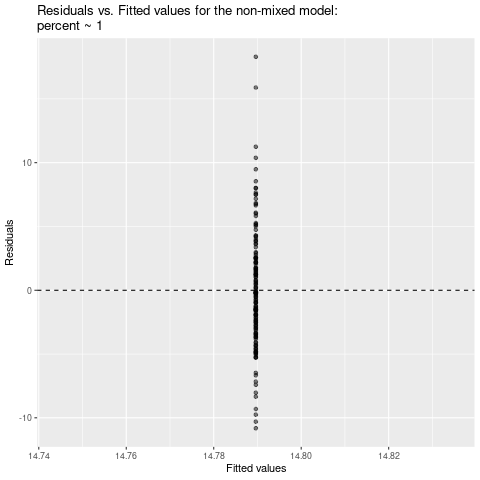

In [30]:
%%R
# Residuals vs. Fitted plot directly in Jupyter with gglm()
ggplot(data = non_mixed_model) +
  stat_fitted_resid() +
  labs(title = sprintf("Residuals vs. Fitted values for the non-mixed model:\n%s",
                       paste(deparse(formula(non_mixed_model)), collapse = "")))

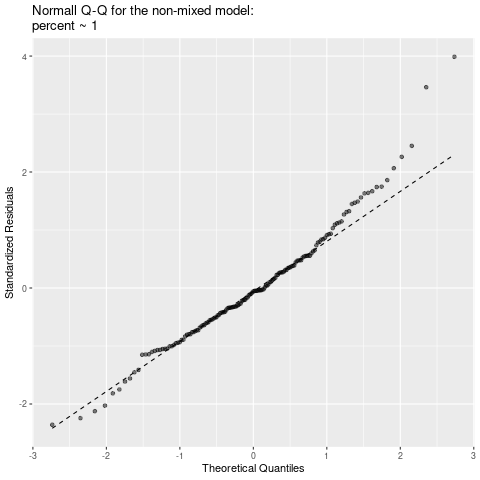

In [31]:
%%R
# Normal Q-Q plot.
ggplot(data = non_mixed_model) +
  stat_normal_qq() +
  labs(title = sprintf("Normall Q-Q for the non-mixed model:\n%s",
                       paste(deparse(formula(non_mixed_model)), collapse = "")))

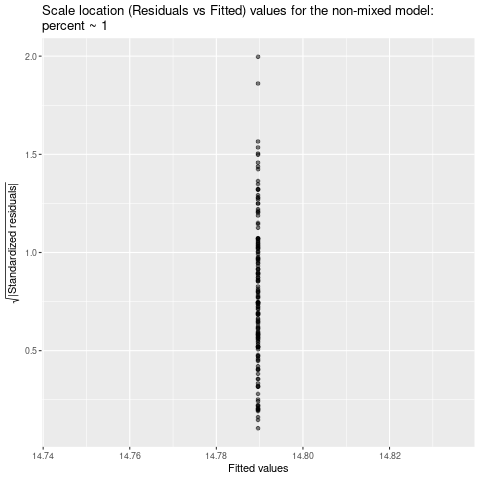

In [32]:
%%R
# Scale location diagnostic plot.
ggplot(data = non_mixed_model) +
  stat_scale_location(
  alpha = 0.5,
  na.rm = TRUE,
  se = TRUE,
  method = "loess",
  color = "steelblue",
  ) +
  labs(title = sprintf("Scale location (Residuals vs Fitted) values for the non-mixed model:\n%s",
                       paste(deparse(formula(non_mixed_model)), collapse = "")))

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  pseudoinverse used at 0.0062112

R[write to console]: 2: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  neighborhood radius 3.119e-15

R[write to console]: 3: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  reciprocal condition number  0

R[write to console]: 4: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  at  0.0062112

R[write to console]: 5: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R

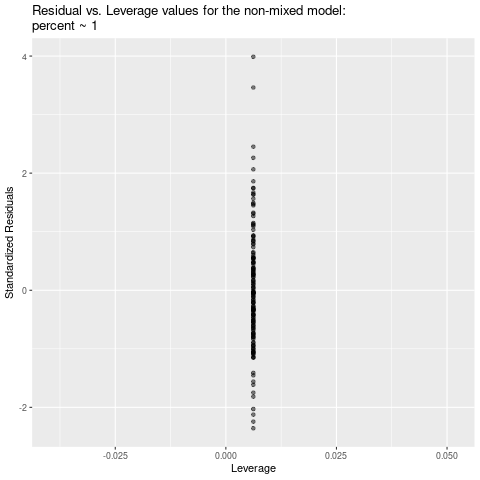

In [33]:
%%R
# Residual vs. leverage plot.
ggplot(data = non_mixed_model) +
  stat_resid_leverage(
  alpha = 0.5,
  method = "loess",
  se = TRUE,
  color = "steelblue",
  ) +
  labs(title = sprintf("Residual vs. Leverage values for the non-mixed model:\n%s",
                       paste(deparse(formula(non_mixed_model)), collapse = "")))

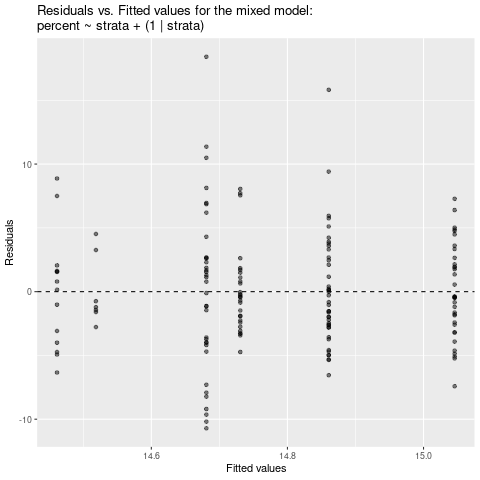

In [34]:
%%R
# Residuals vs. Fitted plot directly in Jupyter with gglm()
ggplot(data = mixed_model) +
  stat_fitted_resid() +
  labs(title = sprintf("Residuals vs. Fitted values for the mixed model:\n%s",
                       paste(deparse(formula(mixed_model)), collapse = "")))

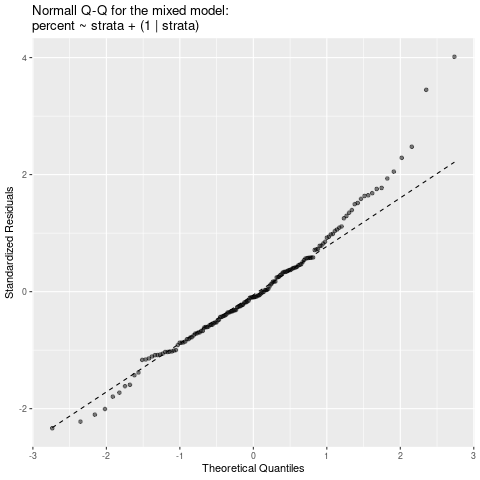

In [35]:
%%R
# Normal Q-Q plot
ggplot(data = mixed_model) +
  stat_normal_qq() +
  labs(title = sprintf("Normall Q-Q for the mixed model:\n%s",
                       paste(deparse(formula(mixed_model)), collapse = "")))

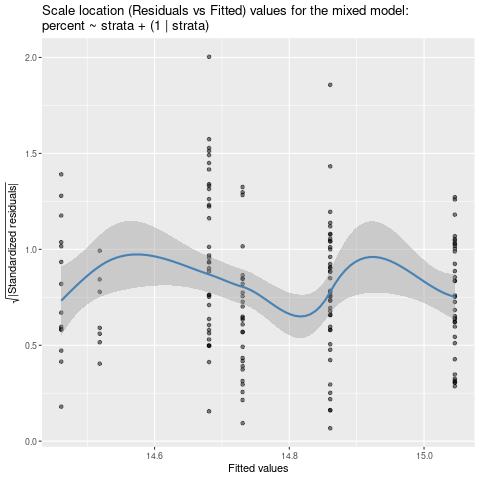

In [36]:
%%R
# Scale location diagnostic plot.
ggplot(data = mixed_model) +
  stat_scale_location(
  alpha = 0.5,
  na.rm = TRUE,
  se = TRUE,
  method = "loess",
  color = "steelblue",
  ) +
  labs(title = sprintf("Scale location (Residuals vs Fitted) values for the mixed model:\n%s",
                       paste(deparse(formula(mixed_model)), collapse = "")))

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  pseudoinverse used at 0.023214

R[write to console]: 2: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  neighborhood radius 0.0125

R[write to console]: 3: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  reciprocal condition number  1.159e-15

R[write to console]: 4: 
R[write to console]: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
R[write to console]: 
 
R[write to console]:  There are other near singularities as well. 5.102e-05

R[write to console]: 5: 
R[write to console]: In predLoess(object$y, object$x, newx = if (is.null(newd

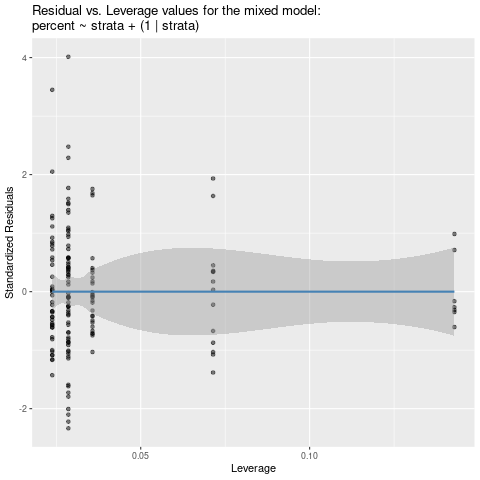

In [37]:
%%R
# Residual vs. leverage plot.
ggplot(data = mixed_model) +
  stat_resid_leverage(
  alpha = 0.5,
  method = "loess",
  se = TRUE,
  color = "steelblue",
  ) +
  labs(title = sprintf("Residual vs. Leverage values for the mixed model:\n%s",
                       paste(deparse(formula(mixed_model)), collapse = "")))

In [38]:
# Create the ggplot objects for each model
plot1 = rpy2.robjects.r['gglm'](non_mixed_model[0])
plot2 = rpy2.robjects.r['gglm'](non_mixed_model[1])
plot3 = rpy2.robjects.r['gglm'](non_mixed_model[2])
plot4 = rpy2.robjects.r['gglm'](non_mixed_model[3])

# Arrange them in a single column layout
grid_arrange = rpy2.robjects.r['grid.arrange']
grid_arrange(plot1, plot2, plot3, plot4, ncol=1)

NameError: name 'non_mixed_model' is not defined

In [ ]:
# Create the ggplot objects for each model
plot1 = rpy2.robjects.r['gglm'](non_mixed_model)[0]
plot2 = rpy2.robjects.r['gglm'](non_mixed_model)[1]
plot3 = rpy2.robjects.r['gglm'](non_mixed_model)[2]
plot4 = rpy2.robjects.r['gglm'](non_mixed_model)[3]

# Arrange them in a single column layout
grid_arrange = rpy2.robjects.r['grid.arrange']
grid_arrange(plot1, plot2, plot3, plot4, ncol=1)

In [ ]:
# If you want to represent matplotlib plots in Jupyter cells...
# '%matplotlib inline' causes the plots to appear right below the cell.
# '%matplotlib notebook' magic command does not only plots the graph below the cell; it 
# also plots the graph in an interactive window.
%matplotlib inline
%matplotlib ipympl

In [ ]:
%%R
# Base R approach (if gglm behaves like base R)
par(mfrow=c(4,1))
gglm(non_mixed_model)  # This will produce the 4 plots in one column

In [ ]:
# Create the ggplot objects for each model
# Execute the R code

plot1 = rpy2.robjects.r("""gglm(non_mixed_model)""")

# Arrange them in a single column layout
grid_arrange = rpy2.robjects.r['grid.arrange']
grid_arrange(plot1, ncol=1)

In [ ]:
%%R

# Assuming gglm(non_mixed_model) generates one plot, replicate this for four different diagnostics
plot1 <- plot(non_mixed_model, which=1) # Residuals vs Fitted
plot2 <- plot(non_mixed_model, which=2) # Normal Q-Q
plot3 <- plot(non_mixed_model, which=3) # Scale-Location
plot4 <- plot(non_mixed_model, which=4) # Cook's distance

# Arrange the plots in a 5x1 grid
grid.arrange(plot1, plot2, plot3, plot4, ncol=1)